In [1]:
using Pkg
Pkg.activate("../")

  Activating project at `c:\Users\matsz\programowanie\Optymalizacja_portfela\FinancialPlanner`


In [2]:
using StatsBase, Distributions, Plots, LinearAlgebra, Plots

In [557]:
using Revise

includet("../src/ESGModels/msvar.jl")
includet("../src/ESGModels/msvar_gibs.jl")
includet("../src/ESGModels/msvar_simulate.jl") 

In [599]:
Β1 = [.09 .3 .2; .03 .1 .6]
Σ1 = cor2cov([1 .3; .3 1], [.08, .03])
Β2 = [-.02 .35 .25; .035 .15 .63]
Σ2 = cor2cov([1 .35; .35 1], [.18, .035])


transition_matrix = [.85 .15;.2 .8]

states_zero = [.6, .4]
X = [.12, .06]


n_steps = 1000
test_regimes = simulate_regimes(states_zero, transition_matrix, n_steps, 1)
test_returns = simulate_msvar_returns(test_regimes, [Β1, Β2], [Σ1, Σ2], X, n_steps, 1)[:,:,1]'

1000×2 adjoint(::Matrix{Float64}) with eltype Float64:
 -0.145022   0.0650905
  0.0587028  0.0617163
 -0.146304   0.0777138
  0.192882   0.113125
  0.110105   0.165456
  0.263599   0.151468
  0.366749   0.139178
  0.0322669  0.156328
  0.102922   0.0666343
  0.193559   0.111978
  ⋮          
  0.197682   0.206763
  0.199681   0.220813
  0.338636   0.265263
  0.154375   0.269648
  0.0820149  0.20524
 -0.0440586  0.224779
  0.0203577  0.0611763
 -0.075999   0.0906354
 -0.246956   0.0635477

In [600]:
count(x -> x==1, test_regimes)

195

In [601]:
Y = collect(test_returns[2:end,:])
T = n_steps
p = 1
X = hcat(ones(T-1), test_returns[p:end-1,:])
k= 2 #n_regimes
n_variables = 2
Β = [Β1, Β2]
Σ = [Σ1, Σ2]

2-element Vector{Matrix{Float64}}:
 [0.0064 0.0007199999999999999; 0.0007199999999999999 0.0009]
 [0.0324 0.002205; 0.002205 0.0012250000000000002]

In [602]:
n_burn = 10_000
n_sample = 200
Σ0 = Σ
regimes, t_m, Β_post, Σ_post = msvar(Y, X, transition_matrix, Β, Σ0, n_burn, n_sample)

([2 2 … 2 1; 2 2 … 1 1; … ; 1 1 … 1 1; 1 1 … 1 1], [0.6451347560652756 0.47001779142527783; 0.5542470761744984 0.4041449247619692; … ; 0.514421097485163 0.4999838004852103; 0.5589104519133302 0.5023440965127748;;; 0.3548652439347242 0.5299822085747221; 0.4457529238255014 0.5958550752380307; … ; 0.48557890251483715 0.5000161995147896; 0.44108954808666995 0.49765590348722527], Vector{Any}[[[-0.0028900476911856146 0.4013249039263004 0.23523340407375762; 0.034325741896106716 0.14019907534159398 0.6371537743384144], [0.010526605420605352 0.26086811602781934 0.3050557989752881; 0.03338387396941524 0.143043503015532 0.6106237141165497]], [[-0.007383120420542671 0.3662734318319706 0.2903099669626867; 0.03465744875820831 0.13737747555077684 0.6081012056108294], [0.014761634466830922 0.31265507292889977 0.22872917764657147; 0.03238909763650864 0.1415491557011077 0.6408738900836043]], [[0.004623751029129923 0.3321475384628455 0.28680742816701205; 0.03583631174968308 0.14658593371818826 0.60317890

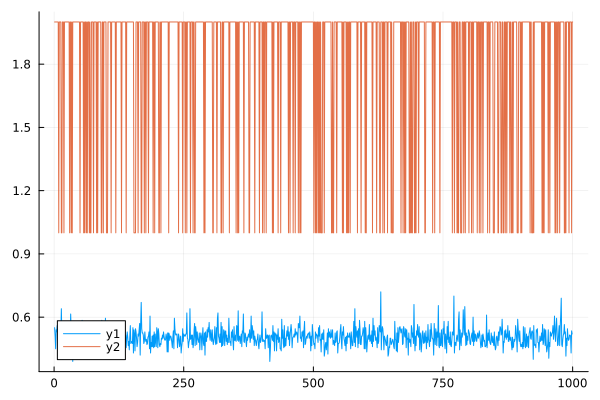

In [603]:
r1 = [count(x -> x ==1, regimes[:,t]) for t in 1:n_steps-1] / n_sample

plot(r1)
plot!(test_regimes)

In [604]:
display("transition matrix")
display(mean(t_m, dims=1)[1,:,:])

display("coefficients")
display("regime one")
display(mean(map(x -> x[1],Β_post)))
display("regime two")
display(mean(map(x -> x[2],Β_post)))


cov1_mean = mean(map(x -> x[1], Σ_post))
cov2_mean = mean(map(x -> x[2], Σ_post))

display("standard deviations")
display("regime one")
display(sqrt.(diag(cov1_mean)))
display("regime two")
display(sqrt.(diag(cov2_mean)))


display("correlations")
display("regime one")
display(cov2cor(cov1_mean))
display("regime two")
display(cov2cor(cov2_mean))



"transition matrix"

2×2 Matrix{Float64}:
 0.494772  0.505228
 0.515203  0.484797

"coefficients"

"regime one"

2×3 Matrix{Float64}:
 0.00414562  0.338258  0.254472
 0.0335612   0.143201  0.624487

"regime two"

2×3 Matrix{Float64}:
 0.00283653  0.340728  0.26483
 0.0331916   0.143678  0.628774

"standard deviations"

"regime one"

2-element Vector{Float64}:
 0.008490614011476535
 0.0016485734233774043

"regime two"

2-element Vector{Float64}:
 0.008034124808346765
 0.001603524068867465

"correlations"

"regime one"

2×2 Matrix{Float64}:
 1.0       0.135812
 0.135812  1.0

"regime two"

2×2 Matrix{Float64}:
 1.0       0.243725
 0.243725  1.0

In [605]:
mean(map(x -> x[1],sp))

2×2 Matrix{Float64}:
 0.00853333  0.00096
 0.00096     0.0012

In [606]:
mat = [1 2 3; 4 5 6]

eachcol(mat)

3-element ColumnSlices{Matrix{Int64}, Tuple{Base.OneTo{Int64}}, SubArray{Int64, 1, Matrix{Int64}, Tuple{Base.Slice{Base.OneTo{Int64}}, Int64}, true}}:
 [1, 4]
 [2, 5]
 [3, 6]